In [33]:
import pandas as pd
pd.set_option('display.max_rows', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

In [34]:
# read in data
covid_f_raw = pd.read_csv('data/covid_forecast_2020-12-03.csv')
covid_h_raw = pd.read_csv('data/COVID_historical_us-counties.csv')

In [35]:
census_raw = pd.read_csv('data/2010_census_pop.csv',
                    converters={'Zip Code ZCTA': lambda x: str(x)})
pop_den_raw = pd.read_csv('data/uszips_pop_density.csv',
                     converters={'zip': lambda x: str(x)})

In [36]:
fb = pd.read_table('data/county_county_aug2020.tsv', 
                   converters={'user_loc': lambda x: str(x), 
                               'fr_loc': lambda x: str(x)})

In [37]:
zips_fips_raw = pd.read_csv('data/zips_fips.csv',
                           converters={'ZIP': lambda x: str(x)})

**Areas of interest**

```
Challenges:
1) large dataset
- use random samples or duplicates?
2) dispersion of data -> challenging to work with
- use log transformation?

Notes
- how to treat counties?  Have to treat them in pairs or singularly?
- some counties are dropped because of low fb users
- SCI formula

How to wrangle data:
1) Take random sample from population ~ 1 million rows
2) Remove duplicates ~ 5 million rows

Data Cleaning
1) add zeros to four digit zip codes - won't do
2) add population data by zip code - done
3) normalize cases/per capita - not started
4) dataset of cities and zip code - not started
5) added log transformation field - done

Views of Analysis:
- two buckets - high/low - won't do
- stratified buckets - 5 or more? 

EDA - questions to answer
The Basics
- Are zip links directional? - done
- What are the highest/smallest SCI indices, by zip? - done
    -> create histogram of distribution of SCI indices - done
- distribution of SCI indices? - done 
- What's the range of SCI indices? - done
- How many zip pairs are there? - done
- Average scaled_sci per zip? Zips with highest, lowest scaled_sci? - done, won't do
- view of zip and average SCI - done

How does the SCI relate to population? Do we see higher SCIs in zips with greater populations?
1a) SCI vs population, all zips - DONE
scatterplot of zip codes with dependent variable as SCI, independent variable as pop
1b) SCI vs population/sq kilometer - DONE
2) SCI vs population, grouped zips by population buckets
- What range does SCI take over various population buckets?

Additional Data Cleaning
- mapping of FIPs to ZIPs
- conversion of FIPs and ZIPs to dtype object vs int

Total cases of Covid
1) SCI vs total COVID cases

Historical spread of COVID, relationship to SCI - timeseries
1) How does the historical spread rate of COVID differ between counties with high SCI scores and those with low SCI scores?

Future spread of COVID, relationship to SCI
- Do prediction models indicate counties with higher SCIs will get more cases?

Can I provide a recommendation to public health experts on potential areas of spread?

Hypothesis testing
- Is the incidence of COVID between zip pairs with high SCI significantly different than the incidence of COVID between zip pairs with low SCI?

Questions
- How am I defining the incidence of COVID? Spread? total number of cases? growth rate over time?
- Recommendations/audience definition

Extra Credit
Network graph approach 
- how should network analysis be used as a tool to fight disease spread?
1) Which nodes (zip codes) have the highest number of connections to other nodes (zip codes)? 
1a) Which nodes w/highest covid spread have highest number of connections to other high disease nodes? 
* edges would be scaled for a minimum SCI
* degree centrality

GIS graphs
- sample two counties - show maps of SCI


data sources:
covid_forecast_2020-12-03.csv - nytimes
COVID_historical_us-counties.csv - nytimes
fb_SCI_county_county_aug2020.tsv - facebook data for good
2010_census_pop.csv - US Census Bureau 
uszips_pop_density.csv - https://simplemaps.com/data/us-zips
zip-county-fips - https://www.kaggle.com/danofer/zipcodes-county-fips-crosswalk

c_historical = pd.read_csv('data/COVID_historical_us-counties.csv')
fb_sci = pd.read_csv('data/fb_SCI_county_county_aug2020.tsv', sep='\t')
census = pd.read_csv('data/2010_census_pop.csv')
pop_den = uszips_pop_density.csv
zip_fips = zips_fips.csv
```


## Data Cleaning

In [38]:
# create 
fb['log_sci'] = np.log10(fb['scaled_sci'])

In [39]:
# create population density table
pop_den = pop_den_raw[['zip', 'density']]
pop_den

,zip,density
0,00601,111.4
1,00602,523.5
2,00603,667.9
3,00606,60.4
4,00610,312.0
...,...,...
33092,99923,2.1
33093,99925,5.7
33094,99926,4.2
33095,99927,0.2


In [40]:
pop_den

,zip,density
0,00601,111.4
1,00602,523.5
2,00603,667.9
3,00606,60.4
4,00610,312.0
...,...,...
33092,99923,2.1
33093,99925,5.7
33094,99926,4.2
33095,99927,0.2


## EDA - questions to answer

### The Basics

**Are zip links directional?**

In [41]:
fb['scaled_sci']

0           13971142
1             145133
2             200193
3             371688
4              95859
              ...   
10426436       13881
10426437        8328
10426438    11155562
10426439    14004203
10426440    37515311
Name: scaled_sci, Length: 10426441, dtype: int64

**What are the min and max SCIs?**

In [42]:
fb['scaled_sci'].describe().astype(int)

count      10426441
mean          46074
std         2179666
min               1
25%            1081
50%            1942
75%            4036
max      1000000000
Name: scaled_sci, dtype: int64

**What is the distribution of SCI indices?**

In [43]:
fb.median()

user_loc      30035.000000
fr_loc        30035.000000
scaled_sci     1942.000000
log_sci           3.288249
dtype: float64

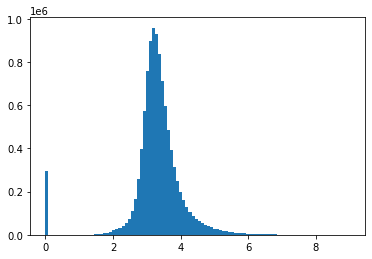

In [44]:
plt.hist(fb['log_sci'], bins=100);

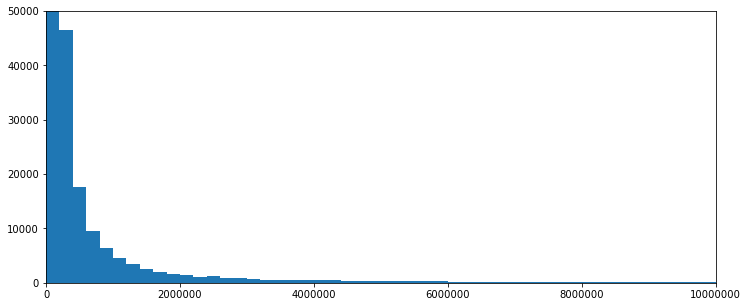

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
counts, bins, patches = ax.hist(fb['scaled_sci'], bins=5000)
ax.set_ylim(0, 50000)
ax.set_xlim(0, 10000000)
ax.ticklabel_format(useOffset=False, style='plain')

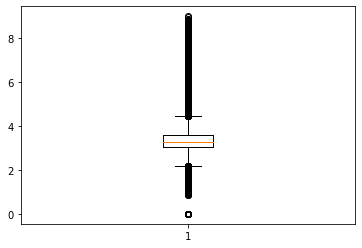

In [46]:
plt.boxplot(fb['log_sci'])
ax.ticklabel_format(useOffset=False, style='plain');

**Average scaled_sci per zip?**

In [47]:
fb.columns

Index(['user_loc', 'fr_loc', 'scaled_sci', 'log_sci'], dtype='object')

In [48]:
fb.groupby(by='user_loc').sum('scaled_sci').astype(int).sort_values(by='log_sci')

,scaled_sci,log_sci
user_loc,,
60020,606989480,2250
69100,506414831,3551
69120,422975097,4891
72093,406876391,5718
72095,275029813,6020
...,...,...
37133,37086591,12432
38053,161550822,12460
29169,53971024,12493


In [49]:
fb.sort_values(by='scaled_sci')

,user_loc,fr_loc,scaled_sci,log_sci
568263,05129,72079,1,0.000000
5483041,31091,06027,1,0.000000
6486550,38039,48393,1,0.000000
6486549,38039,48391,1,0.000000
4328891,27055,38085,1,0.000000
...,...,...,...,...
8197740,48033,48033,684633720,8.835458
7722930,46063,46063,757162537,8.879189
5332730,30109,30109,789302096,8.897243
303620,02282,02282,899409678,8.953958


### How does the SCI relate to population?

#### SCI vs Population

In [50]:
census_raw

,Zip Code ZCTA,2010 Census Population
0,01001,16769
1,01002,29049
2,01003,10372
3,01005,5079
4,01007,14649
...,...,...
33087,99923,87
33088,99925,819
33089,99926,1460
33090,99927,94


In [51]:
census_join = census_raw.set_index('Zip Code ZCTA').join(fb.set_index('user_loc'))
cen_re = census_join.reset_index().dropna(axis=0).drop(columns='fr_loc').groupby(by='index').mean('scaled_sci')
cen_re.rename(columns={'index':'user_zip', '2010 Census Population': 'pop'}, inplace=True)

In [52]:
cen_re.reset_index()

,index,pop,scaled_sci,log_sci
0,01001,16769.0,18051.920718,3.447295
1,01003,10372.0,10736.893465,3.591924
2,01005,5079.0,69717.397027,3.284667
3,01007,14649.0,36740.415609,3.277721
4,01009,741.0,13407.449675,3.320542
...,...,...,...,...
1486,72141,625.0,37517.751936,2.324113
1487,72143,35169.0,27528.043667,2.530625
1488,72149,0.0,48107.852896,2.163793
1489,72153,2572.0,39053.460824,2.377968


In [53]:
x = cen_re['pop']
y = cen_re['scaled_sci']

Text(0.5, 1.0, 'Mean SCI vs. Population')

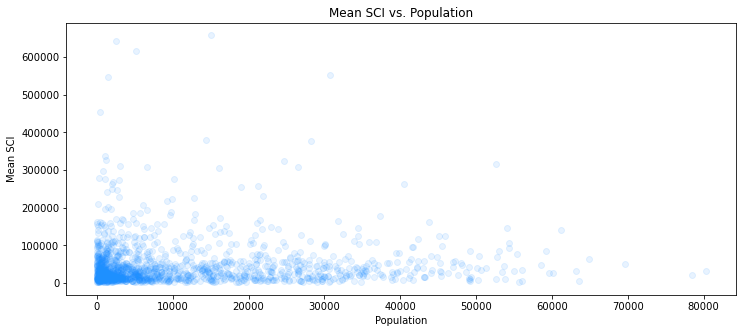

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('Mean SCI')
ax.set_xlabel('Population')
ax.set_title('Mean SCI vs. Population')

#### SCI vs Population, log transformation

In [55]:
cen_re['log_sci'] = np.log10(cen_re['scaled_sci'])

In [56]:
x = cen_re['pop']
y = cen_re['log_sci']

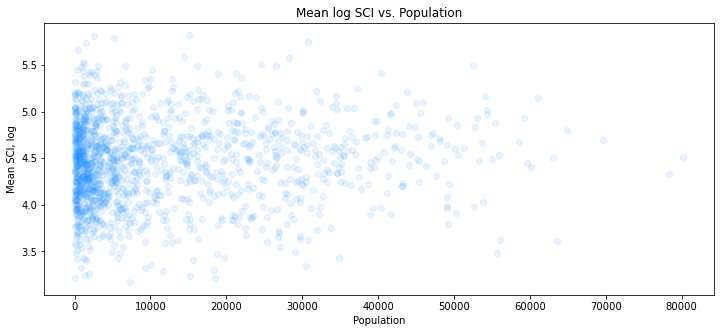

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('Mean SCI, log')
ax.set_xlabel('Population')
ax.set_title('Mean log SCI vs. Population');

#### SCI (log transformation) vs Population/sq km

In [58]:
popdensci = cen_re.join(pop_den.set_index('zip'))

''

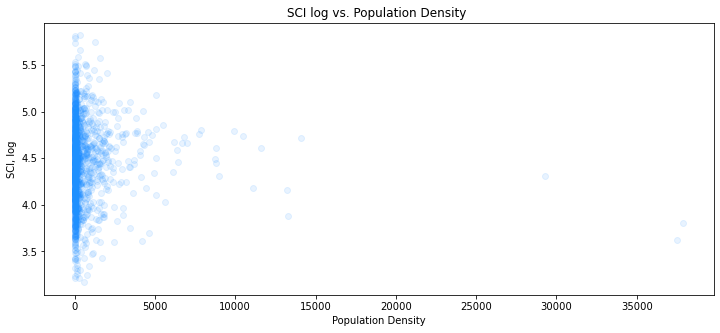

In [59]:
x = popdensci['density']
y = popdensci['log_sci']

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x, y, alpha=.1, color='dodgerblue')
ax.set_ylabel('SCI, log')
ax.set_xlabel('Population Density')
ax.set_title('SCI log vs. Population Density ')
;

### SCI vs total COVID cases

#### Data Cleaning

In [60]:
# grouping covid cases by fips
covid_h = covid_h_raw.groupby('fips').sum()
# tables used below:
## popdensci, zips_fips_raw, covid_h

In [61]:
popdensci.join(zips_fips_raw.set_index('ZIP'))\
.astype({'STCOUNTYFP':'object'})\
.reset_index()\
.set_index('STCOUNTYFP')\
.join(covid_h)\
.rename(columns={'index':'zip'})\
.dropna(axis=0)

,zip,pop,scaled_sci,log_sci,density,COUNTYNAME,STATE,CLASSFP,cases,deaths
1001.0,36003,1975.0,14718.700526,4.167869,8.2,Autauga County,AL,H1,273539.0,4496.0
1001.0,36051,2304.0,10743.957572,4.031164,17.5,Autauga County,AL,H1,273539.0,4496.0
1001.0,36067,26954.0,5277.014246,3.722388,43.5,Autauga County,AL,H1,273539.0,4496.0
1001.0,36091,3648.0,6445.646330,3.809266,17.2,Autauga County,AL,H1,273539.0,4496.0
1005.0,36017,3318.0,12606.702694,4.100602,20.6,Barbour County,AL,H1,138913.0,1202.0
...,...,...,...,...,...,...,...,...,...,...
55133.0,53017,5538.0,8285.122639,3.918299,122.2,Waukesha County,WI,H1,1569267.0,17064.0
55133.0,53029,20799.0,6907.350263,3.839311,215.9,Waukesha County,WI,H1,1569267.0,17064.0
55133.0,53045,21686.0,7415.146795,3.870120,582.4,Waukesha County,WI,H1,1569267.0,17064.0
55133.0,53051,35651.0,17320.237845,4.238554,417.9,Waukesha County,WI,H1,1569267.0,17064.0
